In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

%matplotlib inline

In [2]:
!wget -O fuel_consumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-10-12 17:37:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘fuel_consumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.1s    

2020-10-12 17:37:46 (477 KB/s) - ‘fuel_consumption.csv’ saved [72629/72629]



In [3]:
df= pd.read_csv("fuel_consumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<function matplotlib.pyplot.show(*args, **kw)>

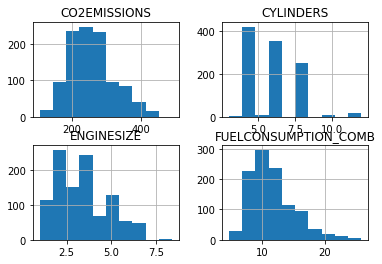

In [6]:
viz=cdf
viz.hist()
plt.show

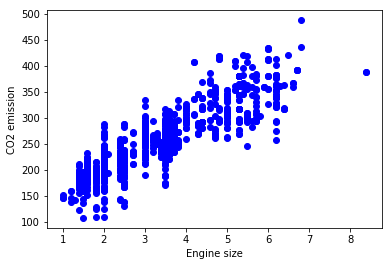

In [7]:
#plot each against CO2EMISSION

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="Blue")
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

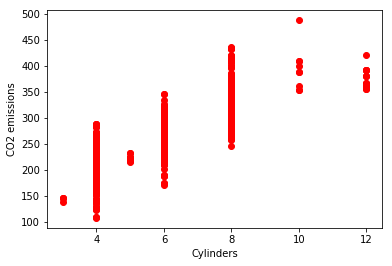

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = "Red")
plt.xlabel("Cylinders")
plt.ylabel("CO2 emissions")
plt.show()

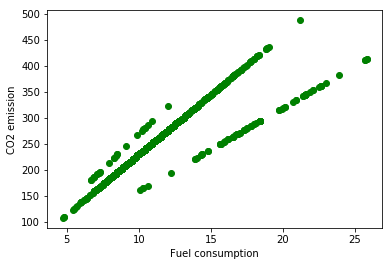

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="Green")
plt.xlabel("Fuel consumption")
plt.ylabel("CO2 emission")
plt.show()

In [10]:
#now spiltting the data
#80% of data is to be used for training and 20 for testing

msk = np.random.rand(len(df)) < 0.8
#train data
train= cdf[msk]
test = cdf[~msk]

# # simple linear regression

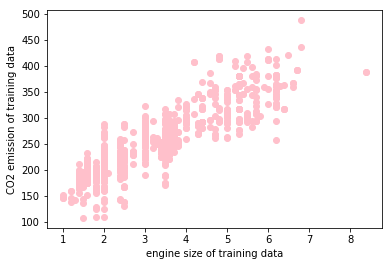

In [11]:
#to check train data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='Pink')
plt.xlabel("engine size of training data")
plt.ylabel("CO2 emission of training data")
plt.show()

# modelling

In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
reg.fit(train_x, train_y)
#to print coefficient and intercept
print("the coefficient is", reg.coef_)
print("\n the intercept is", reg.intercept_)

the coefficient is [[39.03223871]]

 the intercept is [125.24633713]


Text(0, 0.5, 'CO2EMISSION')

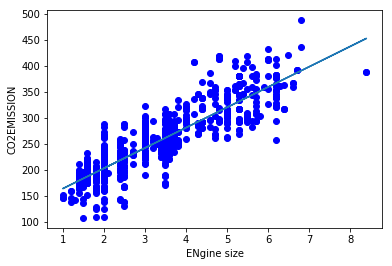

In [13]:
#to plot fitline over data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0] )
plt.xlabel("ENgine size")
plt.ylabel("CO2EMISSION")


# Evaluation


In [14]:
#to check how effective is our model we will check using r2 score
#the larger the r2 square better the model, if 1 bst model, if -1 worst model

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y__ = reg.predict(test_x)

print("mean absolute error %.2f" %np.mean(np.absolute(test_y__ - test_y)) )
print("mean square error %.2f" %np.mean((test_y__ - test_y)**2))
print("print r2 score %.2f" %r2_score(test_y, test_y__))

mean absolute error 22.03
mean square error 856.33
print r2 score 0.77
